In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
#from tqdm.notebook import tqdm

In [3]:
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

train_data.head()

,x,y
0,34,36.951713
1,77,75.385850
2,70,72.652601
3,55,53.178152
4,14,20.836313


In [4]:
print(f"Train Shape: {train_data.shape}")
print(f"Test Shape: {test_data.shape}")

Train Shape: (1000000, 2)
Test Shape: (1000000, 2)


In [25]:
X_train, y_train = train_data['x'][:10000], train_data['y'][:10000]
X_test, y_test = test_data['x'][:2000], test_data['y'][:2000]

print(f"Train data shape: {X_train.shape} | {y_train.shape}")
print(f"Test data shape: {X_test.shape} | {y_test.shape}")


print(f"yyyyyyyyy test \n{y_test[0]}")

Train data shape: (10000,) | (10000,)
Test data shape: (2000,) | (2000,)
yyyyyyyyy test 
9.542323846


In [6]:
def plot_predictions(train_data: torch.Tensor,
                     train_labels: torch.Tensor,
                     test_data: torch.Tensor,
                     test_labels: torch.Tensor,
                     predictions: torch.Tensor = None):
    plt.figure(figsize=(5, 4))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14});

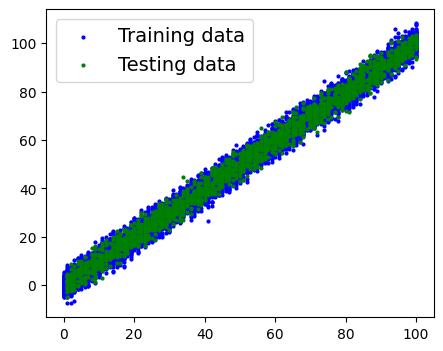

In [7]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [8]:
# Build Model
import torch
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
    def forward(self, x: torch.Tensor):
        y = x * self.weights + self.bias #  as the formula (y = x * w + b)
        return y

In [9]:
model_0 = LinearRegressionModel()
print(f"Model_0 Parameters: {list(model_0.parameters())}")

print(f"Named Parameters: {model_0.state_dict()}")


Model_0 Parameters: [Parameter containing:
tensor([1.4032], requires_grad=True), Parameter containing:
tensor([0.2057], requires_grad=True)]
Named Parameters: OrderedDict([('weights', tensor([1.4032])), ('bias', tensor([0.2057]))])


In [10]:
# Predict
with torch.inference_mode(): 
    X_test = torch.tensor(X_test)
    y_preds = model_0(X_test)

print(f"Predicted value: {y_preds}")

Predicted value: tensor([ 10.0279, 123.6852, 123.6852,  ..., 113.8629,  63.3486,  56.3327])


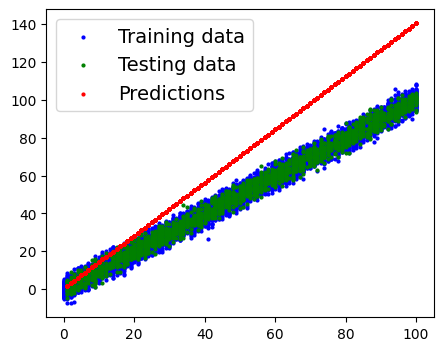

In [11]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [12]:
y_test = torch.tensor(y_test)
y_preds = torch.tensor(y_preds)
print(f"Difference between labeled data and predictions {y_test - y_preds}")

Difference between labeled data and predictions tensor([ -0.4856, -31.1655, -36.0181,  ..., -34.4279, -20.7970, -21.3450],
       dtype=torch.float64)


C:\Users\Hp\AppData\Local\Temp\ipykernel_13772\2228403087.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_preds = torch.tensor(y_preds)


In [13]:
print(f"Loss in one parameter: {y_preds[0] - y_test[0]}")
print(f"yyyyyyyyyyyy: {y_test[0]}")

Loss in one parameter: 0.48558924756689414
yyyyyyyyyyyy: 9.542323846


In [14]:
loss_function = nn.L1Loss() # Mean Absolute Error

In [15]:
optimizer = torch.optim.SGD(model_0.parameters(), # model parameters to optimize
                              lr=0.001, # learning rate (how fast the model learns)
                            )

In [16]:
def train(
        model: nn.Module,
        train_data: torch.Tensor,
        train_labels: torch.Tensor,
        test_data: torch.Tensor,
        test_labels: torch.Tensor,
        loss_function: nn.Module,
        optimizer: torch.optim.Optimizer,
        epochs: int,
    ):
    epochs_count ,train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(epochs+1):
        model.train()
        y_pred = model(train_data)
        loss = loss_function(y_pred, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_pred = model(test_data)
            test_loss = loss_function(y_pred, test_labels)

        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_arr.append(loss.detach().numpy())
            test_loss_arr.append(test_loss.detach().numpy())
            print(f"Epoch {epoch}: MAE Loss: {loss.item():0.2f} | Test Loss: {test_loss.item():0.2f}")
    return epochs_count, train_loss_arr, test_loss_arr


In [17]:
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_test  =torch.tensor(X_test)
y_test = torch.tensor(y_test)


epochs_count, train_loss, test_loss = train(
                                        model_0, 
                                        train_data=X_train, 
                                        train_labels=y_train, 
                                        test_data=X_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )

C:\Users\Hp\AppData\Local\Temp\ipykernel_13772\2313109918.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test  =torch.tensor(X_test)
C:\Users\Hp\AppData\Local\Temp\ipykernel_13772\2313109918.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test)


Epoch 0: MAE Loss: 20.66 | Test Loss: 18.10
Epoch 10: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 20: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 30: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 40: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 50: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 60: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 70: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 80: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 90: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 100: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 110: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 120: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 130: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 140: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 150: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 160: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 170: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 180: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 190: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 200: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 210: MAE Loss: 2.38 | Test Loss: 2.36
Epoch 220: MAE Loss: 2.38 | Test Loss: 2.

In [18]:
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

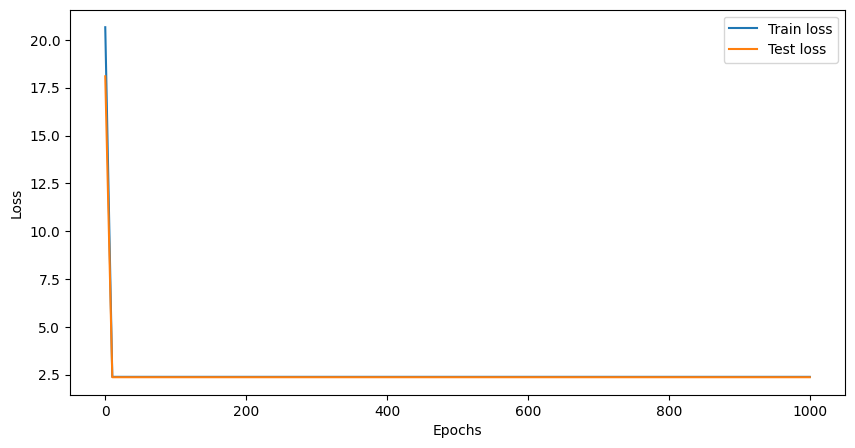

In [19]:
plot_stats(epochs_count, train_loss, test_loss)

In [20]:
def predict(model, X):
    with torch.inference_mode():
        y_pred = model(X)
        return y_pred

In [21]:
y_preds = predict(model_0, X_test)

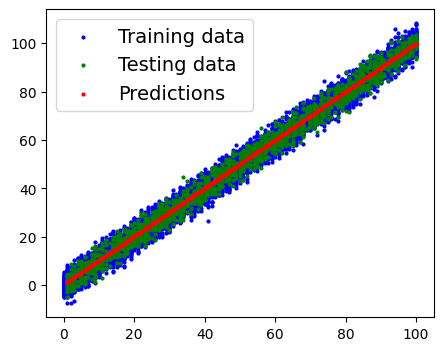

In [22]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds,
)

In [23]:
# Save model
from pathlib import Path

# Create a folder to save our models
model_path = Path('models')
model_path.mkdir(parents=True, exist_ok=True)

# Save the model
model_name = 'model_0.pth'
model_save_path = model_path / model_name

print(f"Saving model to: {model_save_path}")
torch.save(model_0.state_dict(), model_save_path)

Saving model to: models\model_0.pth
